In [29]:
%pylab inline
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


/Users/mgb/anaconda3/envs/keras/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [30]:
simple_network = nx.Graph()

n = 10
e = 18
nodes = np.arange(n)
edges = set(list(zip(*np.random.randint(0,n,(2,e)))))

simple_network.add_nodes_from(nodes)
simple_network.add_edges_from(edges)

/Users/mgb/anaconda3/envs/keras/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


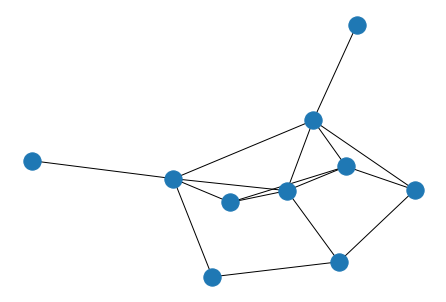

In [31]:
nx.draw(simple_network)

In [32]:
nx.cycles.find_cycle(simple_network)

[(8, 6), (6, 4), (4, 8)]

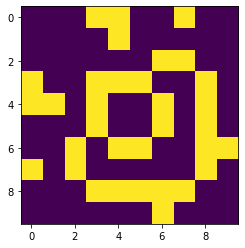

In [41]:
plt.imshow(nx.adjacency_matrix(simple_network).toarray())

In [101]:
%pylab inline
import pandas as pd
import swifter
from dateparser import parse
import networkx as nx
from tqdm import tqdm    

def gen_edge(x):
    '''the edge (x1,y1) is the same as (y1,x1),
    even though the start station ids and end station ids 
    are flipped in the dataframe'''
    return tuple([str(i) for i in sorted((int(x.start_id), int(x.end_id)))])

Populating the interactive namespace from numpy and matplotlib


/Users/mgb/anaconda3/envs/keras/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [63]:
data = pd.read_csv('201809-citibike-tripdata.csv')
data = data.dropna(how='any')

data['start_id'] = data['start station id'].apply(int).apply(str)

data['end_id'] = data['end station id'].apply(int).apply(str)

data['edges'] = data.swifter.apply(gen_edge, axis=1)

In [123]:
citi = nx.Graph()

nodes = set(data.start_id.unique()).union(set(data.end_id.unique()))
citi.add_nodes_from(nodes)

counts = data.groupby('edges').count().tripduration
durations = data.groupby('edges').mean().tripduration

for i,e in tqdm(enumerate(counts.index)):
    citi.add_edge(e[0],e[1],freq=counts[i],dur=durations[i])

117246it [00:02, 53671.76it/s]


In [126]:
import random

start, stop = random.sample(nodes,2)

nx.dijkstra_path(citi, start, stop, weight='dur')

In [128]:
nx.shortest_path(citi, start, stop)

['473', '173', '3541']

In [138]:
from networkx.algorithms import closeness_centrality
from networkx.algorithms import communicability

In [154]:
b_c = nx.betweenness_centrality(citi)

In [164]:
sorted([(v,k) for k,v in b_c.items()])[-10:]

[(0.003572294422348992, '426'),
 (0.003628637824156567, '486'),
 (0.0038342741187959604, '497'),
 (0.004015169323323779, '3142'),
 (0.0045077393742101336, '514'),
 (0.004832005314773408, '519'),
 (0.005689925905924755, '3016'),
 (0.0061164973410873106, '3129'),
 (0.006982909469936176, '327'),
 (0.008443370120747628, '534')]

In [165]:
sorted(citi.degree(), key=lambda x:x[1])[-10:]

[('312', 513),
 ('518', 515),
 ('229', 522),
 ('3142', 526),
 ('412', 538),
 ('265', 538),
 ('3016', 544),
 ('497', 553),
 ('402', 554),
 ('519', 575)]

In [153]:
from networkx.algorithms.distance_measures import center
center(citi)

NetworkXError: Found infinite path length because the graph is not connected